# k-Nearest Neighbor Corss-Validation

## Download dataset from kaggle

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dataset = kagglehub.dataset_download('vishweshsalodkar/wild-animals')

print('Data source import complete.')


Data source import complete.


## Importing libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

## Dataset Loading and Preprocessing

1. **Dataset Directory**: Define the path to the "Animals" folder within the dataset.
2. **Categories**: Retrieve the list of categories (subfolders) in the "Animals" folder.
3. **Image Processing**:
   - Loop through each category and assign a unique label.
   - For each image, read it in BGR format and convert it to grayscale.
   - Resize each image to 256x256 pixels.
4. **Store Data**: Append the processed image and its label as a tuple `(image, label)` to `train_data`.
5. **Progress Tracking**: Use `tqdm` to show a progress bar as the images are being processed.

In [3]:
print(os.listdir(dataset))

['Animals']


In [4]:
dataset = os.path.join(dataset, "Animals")
print(os.listdir(dataset))

['Cheetah', 'Leopard', 'Lion', 'Jaguar', 'Tiger']


In [5]:
categories = os.listdir(dataset)
print(categories)

['Cheetah', 'Leopard', 'Lion', 'Jaguar', 'Tiger']


In [6]:
print([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cheetah-predator-wild-animal-speed-59952.jpeg', 'pexels-photo-7018141.jpeg', 'namibia-84246__340.jpg', 'cheetah-864747__340.jpg', 'pexels-photo-1320604.jpeg', 'cheetah-223734__340.jpg', 'pexels-photo-2793479.jpeg', 'pexels-photo-2017490.jpeg', 'cheetah-2412554__340.jpg', 'cheetahs-171315__340.jpg', 'pexels-photo-624041.jpeg', 'pexels-photo-1109898.jpeg', 'cheetah-2268955__340.jpg', 'pexels-photo-88234.jpeg', 'cheetah-171217__340.jpg', 'cheetah-1128798__340.jpg', 'pexels-photo-4577770.jpeg', 'animal-africa-wilderness-zoo.jpg', 'cheetahs-5689873__340.jpg', 'cheetahs-cubs-two-together-162318.jpeg', 'cheetah-3099722__340.jpg', 'cheetah-448901__480.jpg', 'pexels-photo-8074701.jpeg', 'pexels-photo-4577569.jpeg', 'cheetah-322310__340.jpg', 'cheetah-4096056__340.jpg', 'pexels-photo-2274018.jpeg', 'pexels-photo-3849686.jpeg', 'pexels-photo.jpg', 'pexels-photo-789574.jpeg', 'pexels-photo-1320427.jpeg', 'cheetah-3475778__340.jpg', 'pexels-photo-46324.jpeg', 'cheetah-sitting-big-cat-feline-1623

In [7]:
train_data = []

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (256, 256))
        train_data.append((img_array, label))

100%|██████████| 39/39 [00:00<00:00, 513.62it/s]


In [8]:
print(len(train_data))

170


In [9]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
np.random.shuffle(train_data)

In [11]:
print([train_data[i][1] for i in range(10)])

[1, 0, 4, 4, 2, 0, 1, 4, 3, 0]


## Visualizing the dataset

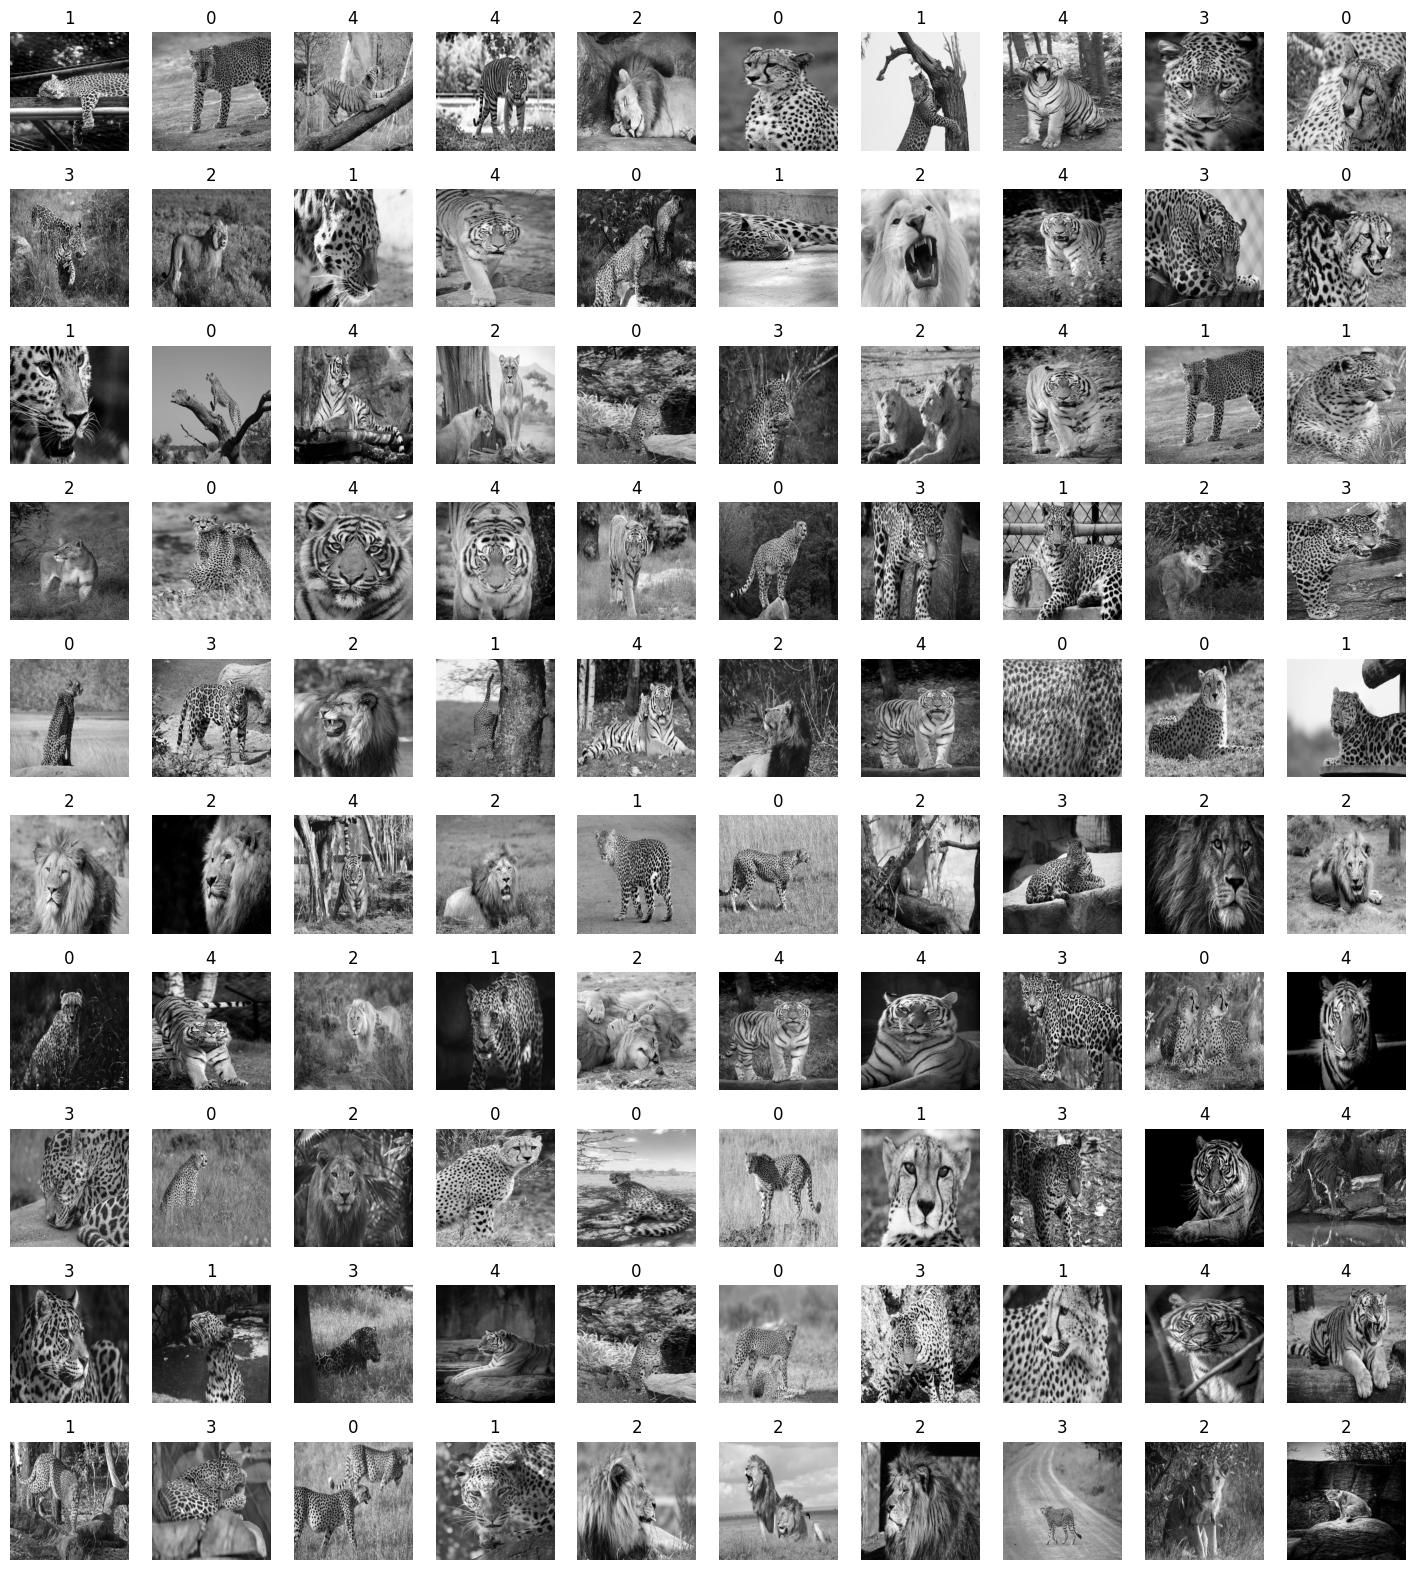

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(18, 20))

for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.show()

## Separating Data into Folds for Cross-Validation

The code creates 5 folds from `train_data` by selecting every 5th element starting from indices `i = 0, 1, 2, 3, 4`. This is done using slicing in Python. The resulting `folds` will contain 5 separate subsets of the data, where each fold is a sample of every 5th element starting from its corresponding index. 

For example, for `i = 0` fold will contain [0, 5, 10, 15, 21, 26,...]th elements of `train_data`

The length of `folds` will be 5, representing the 5 different subsets.

In [13]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [14]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}: {labels} Count: {len(fold)}")

Fold 1: [1, 0, 3, 1, 1, 3, 2, 0, 0, 2, 2, 0, 0, 4, 3, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 3, 0, 4, 4, 1, 3, 1, 0, 1] Count: 34
Fold 2: [0, 1, 2, 2, 0, 2, 0, 3, 3, 4, 2, 2, 4, 4, 0, 1, 1, 3, 3, 2, 4, 1, 4, 4, 3, 3, 4, 2, 3, 3, 1, 3, 3, 3] Count: 34
Fold 3: [4, 4, 1, 4, 4, 4, 4, 1, 2, 0, 4, 3, 2, 3, 2, 3, 3, 1, 0, 3, 4, 0, 0, 1, 4, 2, 2, 0, 4, 1, 3, 0, 4, 0] Count: 34
Fold 4: [4, 3, 4, 3, 2, 1, 4, 2, 1, 0, 2, 2, 1, 0, 0, 4, 4, 4, 1, 2, 2, 4, 4, 4, 0, 1, 4, 0, 4, 3, 0, 1, 3, 0] Count: 34
Fold 5: [2, 0, 0, 0, 0, 1, 4, 3, 4, 1, 1, 2, 2, 4, 0, 4, 0, 4, 2, 2, 1, 0, 3, 2, 2, 1, 1, 2, 1, 3, 2, 4, 1, 4] Count: 34


## Fucntion for calculating L2 Distance (Euclidean Distance)

The L2 (Euclidean) distance between two points $ \mathbf{x} = (x_1, x_2, \ldots, x_n) $ and $ \mathbf{y} = (y_1, y_2, \ldots, y_n) $ is given by:
$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

In [ ]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))  

## k-Nearest Neighbors (kNN) Prediction Function

This function predicts the label of a point based on its k nearest neighbors.

1. **Nearest Neighbors Selection**: It first selects the `k` nearest neighbors from the list `l2_distances`.
2. **Extracting Labels**: Then, it extracts the labels associated with these neighbors.
3. **Majority Vote**: Using the `Counter` class, it finds the most common label among these neighbors.
4. **Return Prediction**: Finally, the most common label is returned as the predicted label.

This method uses majority voting to make a prediction for the label based on the closest neighbors.

In [16]:
from collections import Counter

def knn_prediction(l2_distances, k = 1):
    knns = l2_distances[:k]  
    knn_labels = [label for _, label in knns]  
    most_common_label = Counter(knn_labels).most_common(1)[0][0]  

    return most_common_label

## k-Nearest Neighbors (kNN) Cross-Validation with Accuracy Calculation

1. **Loop Over K Values**: The function performs the k-nearest neighbors (kNN) prediction for values of `k` from 1 to 30.
2. **Cross-Validation**: It uses 5-fold cross-validation to evaluate performance. For each fold, the model trains on the remaining 4 folds and tests on the current fold.
3. **Prediction**: For each test image in the validation set, the kNN function computes the L2 (Euclidean) distance to each training image and predicts the label based on majority voting.
4. **Accuracy Calculation**: The accuracy for each fold is calculated by comparing predictions to the true labels.
5. **Store Results**: The fold accuracies and the average accuracies for each k are stored and printed.


In [17]:
fold_accuracies = []  
avg_accuracies = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []   
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies}")
print(f"Average Fold Accuracies: {avg_accuracies}")

K: 1 Average Accuracy: 0.31
K: 2 Average Accuracy: 0.31
K: 3 Average Accuracy: 0.31
K: 4 Average Accuracy: 0.32
K: 5 Average Accuracy: 0.30
K: 6 Average Accuracy: 0.28
K: 7 Average Accuracy: 0.26
K: 8 Average Accuracy: 0.31
K: 9 Average Accuracy: 0.32
K: 10 Average Accuracy: 0.29
K: 11 Average Accuracy: 0.28
K: 12 Average Accuracy: 0.26
K: 13 Average Accuracy: 0.27
K: 14 Average Accuracy: 0.28
K: 15 Average Accuracy: 0.29
K: 16 Average Accuracy: 0.28
K: 17 Average Accuracy: 0.28
K: 18 Average Accuracy: 0.27
K: 19 Average Accuracy: 0.26
K: 20 Average Accuracy: 0.27
K: 21 Average Accuracy: 0.25
K: 22 Average Accuracy: 0.26
K: 23 Average Accuracy: 0.28
K: 24 Average Accuracy: 0.24
K: 25 Average Accuracy: 0.24
K: 26 Average Accuracy: 0.25
K: 27 Average Accuracy: 0.23
K: 28 Average Accuracy: 0.24
K: 29 Average Accuracy: 0.22
K: 30 Average Accuracy: 0.22
Fold Accuracies: [[0.3235294117647059, 0.23529411764705882, 0.4411764705882353, 0.35294117647058826, 0.20588235294117646], [0.3235294117647

## Visualizing Cross-validation Accuracy for k-Nearest Neighbors (kNN)

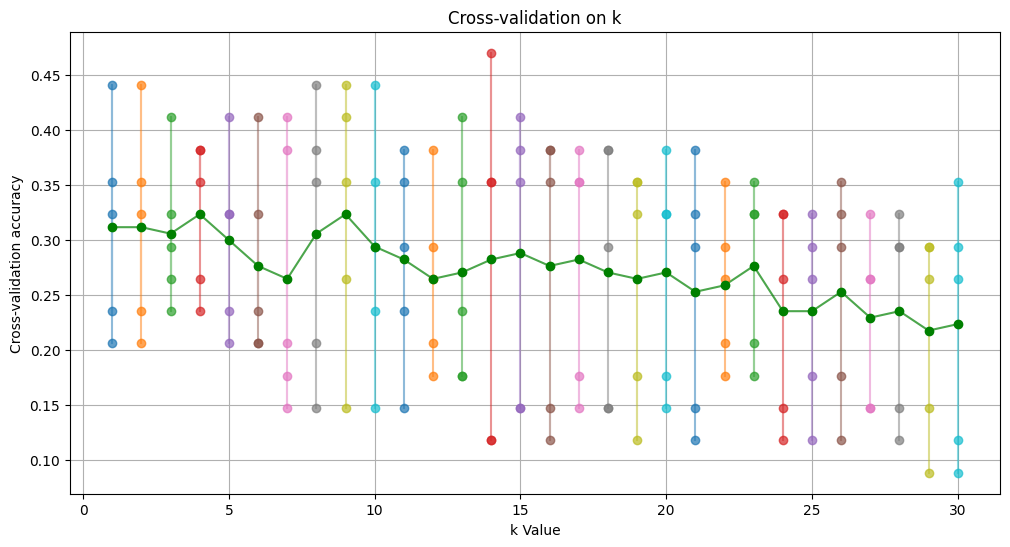

In [18]:
plt.figure(figsize=(12, 6))

# For plotting the 5 fold accuracies in each K
for k, fold_accuracy in enumerate(fold_accuracies):
  plt.scatter([k+1] * len(fold_accuracy), fold_accuracy, zorder=5, alpha=0.7)
  plt.plot([k+1] * len(fold_accuracy), fold_accuracy, linestyle='-', alpha=0.5)


# For plotting the avg accuracy in each K
plt.plot(range(1, 31), avg_accuracies, color='green', alpha=0.7)
plt.scatter(range(1, 31), avg_accuracies, color='green', zorder=10)

plt.xlabel('k Value')
plt.ylabel('Cross-validation accuracy')
plt.title('Cross-validation on k')
plt.grid(True)

plt.show()